In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

exact_polytopes = True
folder_name = "m_3_r_2"
base_path = "data/"
run_id = "run01"

In [2]:
file_name = "/exact_politopes" if exact_polytopes else "/all_politopes"

x = np.load(base_path + folder_name + file_name + "_x.npy", allow_pickle=True)
y = np.load(base_path + folder_name + file_name+ "_y.npy", allow_pickle=True)

run = pd.read_csv("./runs/" + run_id + ".csv")


print("Mean: ", np.mean(y))
print("Std: ", np.std(y))
print("Std squared: ", np.mean(np.std(y)**2))

Mean:  870.952357851899
Std:  44418.43554794235
Std squared:  1972997416.5267084


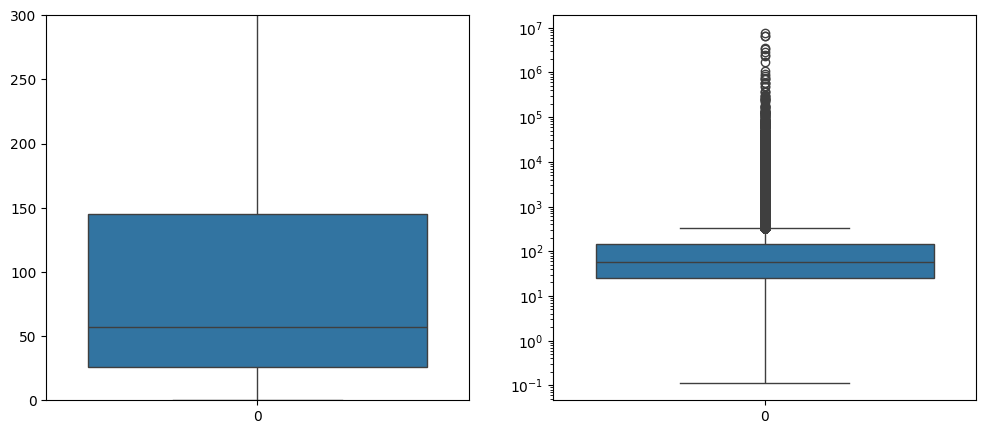

In [3]:
#Analysis of y values
df_y = pd.DataFrame(y)
figure, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df_y, ax=ax[0])
sns.boxplot(data=df_y, ax=ax[1])
ax[1].set_yscale('log')
ax[0].set_ylim(0, 300)
plt.show()

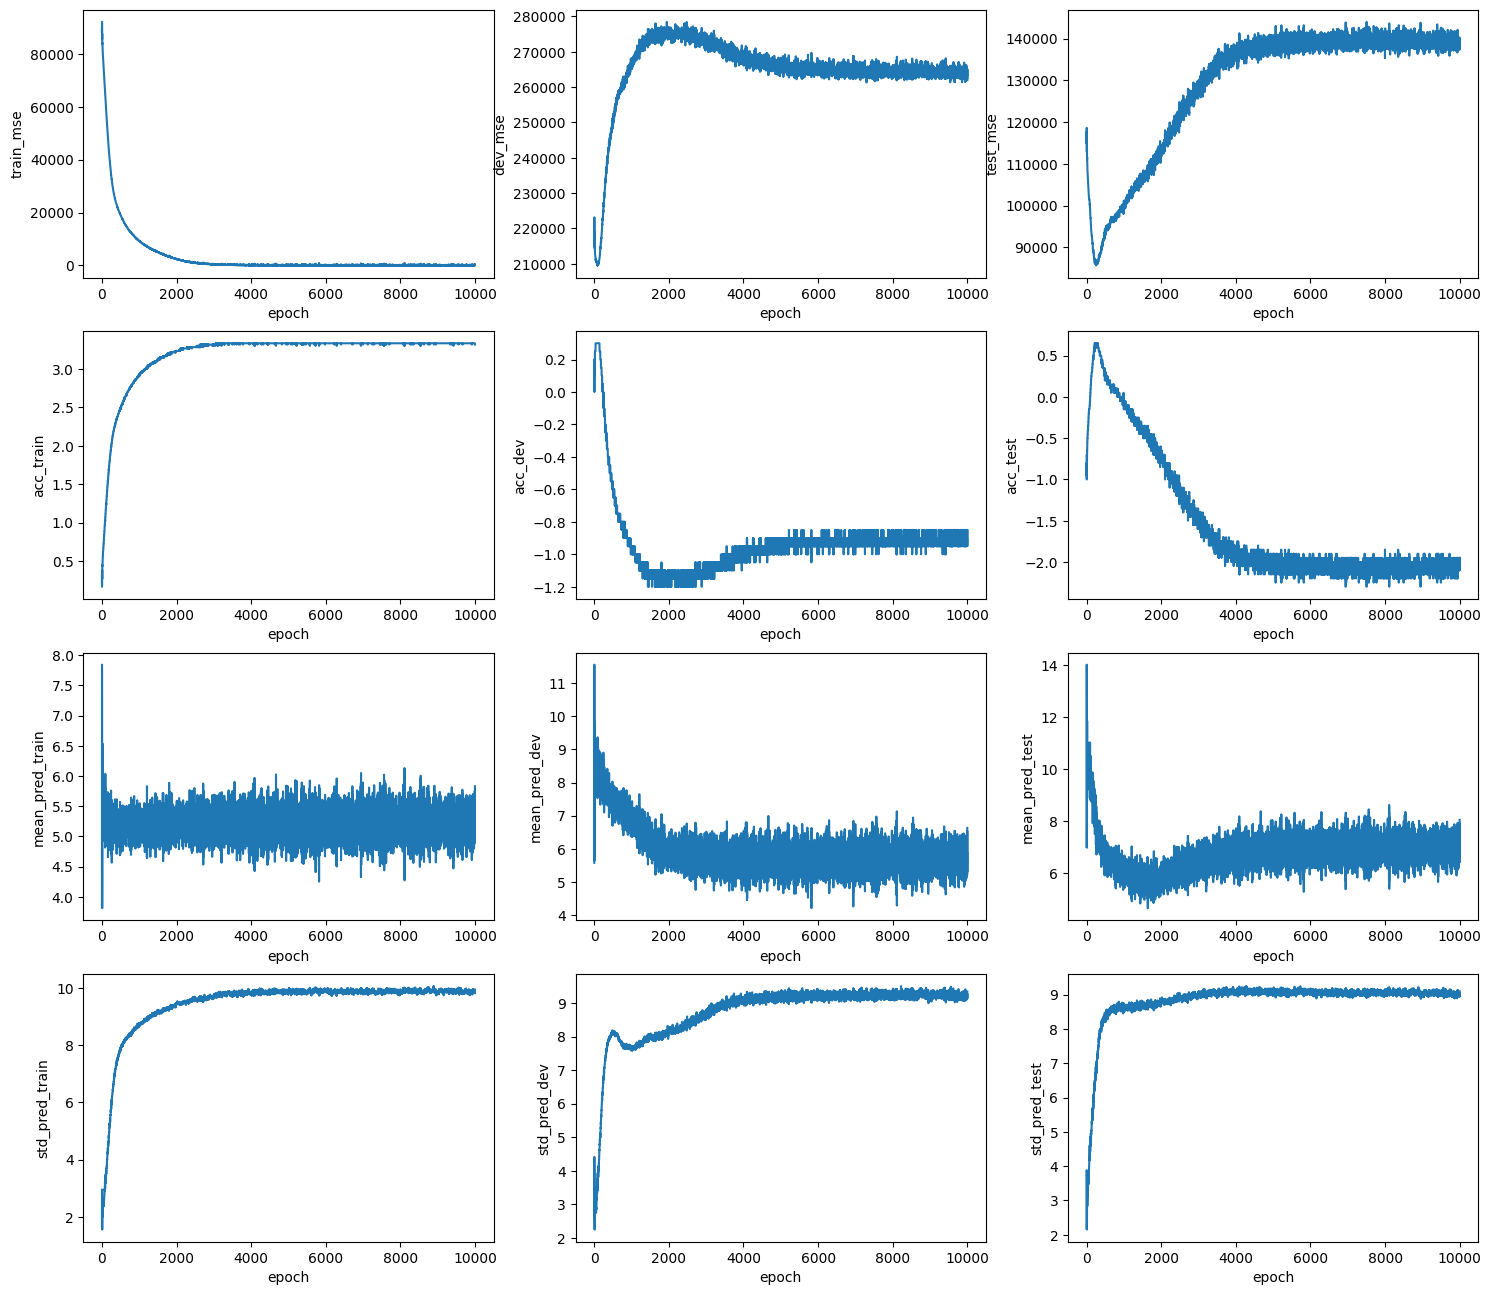

In [8]:

figure2, ax2 = plt.subplots(4, 3, figsize=(18, 16))

sns.lineplot(data=run, x="epoch", y="train_mse", ax=ax2[0, 0])
sns.lineplot(data=run, x="epoch", y="dev_mse", ax=ax2[0, 1])
sns.lineplot(data=run, x="epoch", y="test_mse", ax=ax2[0, 2])

sns.lineplot(data=run, x="epoch", y="acc_train", ax=ax2[1, 0])
sns.lineplot(data=run, x="epoch", y="acc_dev", ax=ax2[1, 1])
sns.lineplot(data=run, x="epoch", y="acc_test", ax=ax2[1, 2])


sns.lineplot(data=run, x="epoch", y="mean_pred_train", ax=ax2[2, 0])
sns.lineplot(data=run, x="epoch", y="mean_pred_dev", ax=ax2[2, 1])
sns.lineplot(data=run, x="epoch", y="mean_pred_test", ax=ax2[2, 2])

sns.lineplot(data=run, x="epoch", y="std_pred_train", ax=ax2[3, 0])
sns.lineplot(data=run, x="epoch", y="std_pred_dev", ax=ax2[3, 1])
sns.lineplot(data=run, x="epoch", y="std_pred_test", ax=ax2[3, 2])

figure.tight_layout()

